In [75]:
%matplotlib inline
from copy import deepcopy

In [3]:
import random
import matplotlib.pyplot as plt

[[1, 0, 1, 1, -1], [0, 1, 1, 1, 1], [0, 1, 0, 1, 1], [1, -1, 0, 1, 1], [0, 0, 0, 0, 0]]


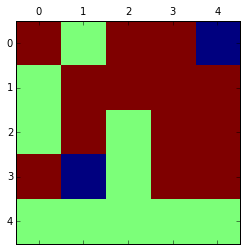

In [80]:
N = 5
maze = [[random.randrange(0,2) for j in range(N)] for i in range(N)]
start, end = [[random.randrange(0,N), random.randrange(0,N)] for i in range(2)]
maze[start[0]][start[1]] = -1
maze[end[0]][end[1]] = -1
plt.matshow(maze)
print maze
temp_maze = deepcopy(maze)

In [94]:
neighbor_filter = [(-1,0), (1,0), (0,1), (0,-1)]
print neighbor_filter

def printMat(mat):
    for k in mat:
        print "\t".join([str(j) for j in k])
printMat(maze)

[(-1, 0), (1, 0), (0, 1), (0, -1)]
1	0	1	1	-1
0	1	1	1	1
0	1	-2	1	1
1	-1	0	1	1
0	0	0	0	0


[(1, 2), (2, 3), (2, 1)] [3, 1] [0, 4]
Maze
1	0	1	1	-1
0	1	1	1	1
0	1	-2	1	1
1	-1	0	1	1
0	0	0	0	0
Temp Maze
1	0	1	1	-1
0	1	1	1	1
0	1	0	1	1
1	-1	0	1	1
0	0	0	0	0


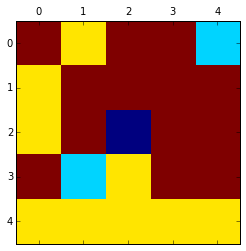

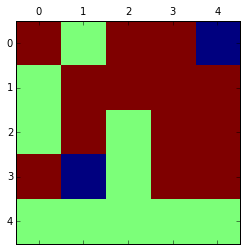

In [98]:
def getNeighbors(x,y):
    if x >= N or x < 0 or y >= N or y < 0:
        print "Wrong Index"
        return
    neighbors = set([((x+k[0]), (y+k[1])) for k in neighbor_filter if x+k[0] >=0 and x+k[0] < N and y+k[1] >=0 and y+k[1] < N])
    neighbors = [k for k in neighbors if maze[k[0]][k[1]] in [-1,1]]
    """
    for k in neighbors:
        maze[k[0]][k[1]] += 5
    """
    return neighbors
maze = deepcopy(temp_maze)
maze[2][2] = -2
print getNeighbors(2,2), start, end
plt.matshow(maze)
plt.matshow(temp_maze)
print "Maze"
printMat(maze)
print "Temp Maze"
printMat(temp_maze)

Visited room:  (4, 1)
Visited room:  (3, 1)
Visited room:  (2, 1)
Visited room:  (2, 0)
Visited room:  (1, 0)
Visited room:  (0, 0)
Visited room:  (0, 1)
Visited room:  (1, 1)
Visited room:  (1, 1)
Dead end
Visited room:  (1, 1)
Dead end


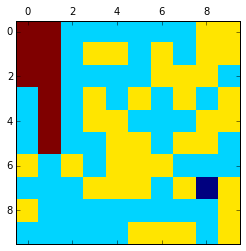

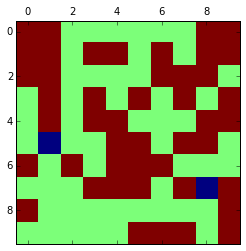

In [124]:
def checkRoom(roomNumber):
    x, y = roomNumber
    if maze[x][y] == 2:
        print "Dead end"
        return False
    maze[x][y] = 2
    for k in getNeighbors(x,y):
        if maze[k[0]][k[1]] == -1:
            print "Solved"
            return True
        else:
            print "Visited room: ", k
            if checkRoom(k):
                return True
            maze[k[0]][k[1]] = 2

maze = deepcopy(temp_maze)
checkRoom(start)
plt.matshow(maze)
plt.matshow(temp_maze)

In [105]:
def genMaze(N=5):
    maze = [[random.randrange(0,2) for j in range(N)] for i in range(N)]
    start, end = [[random.randrange(0,N), random.randrange(0,N)] for i in range(2)]
    maze[start[0]][start[1]] = -1
    maze[end[0]][end[1]] = -1
    plt.matshow(maze)
    return maze, start, end

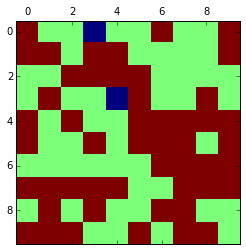

In [136]:
maze, start, end = genMaze(N=10)
#printMat(maze)
temp_maze = deepcopy(maze)

[3, 4]
Visited room:  (2, 4)
Visited room:  (2, 3)
Visited room:  (2, 2)
Visited room:  (1, 3)
Solved


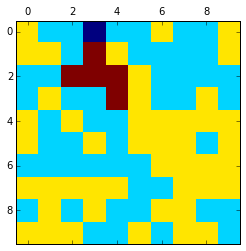

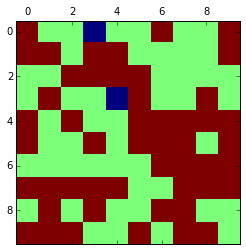

In [137]:
print start
N = 10
maze = deepcopy(temp_maze)
checkRoom(start)
plt.matshow(maze)
plt.matshow(temp_maze)